
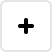
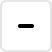
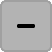
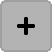
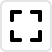
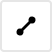
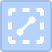
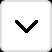
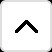
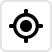

In [1]:
import pandas as pd

from lets_plot import *
from lets_plot.mapping import as_discrete
LetsPlot.setup_html()

In [2]:
def wrap_test(test, geom):
    result = lambda param: test[param] if param in test.keys() else None

    test_aes = test["aes"] if "aes" in test.keys() else {}
    result.aes = lambda a: test_aes[a] if a in test_aes.keys() else None

    result.geom = test["geom"] if "geom" in test.keys() else geom

    result.params = {k: v for k, v in test.items() if k not in ["data", "geom", "title"]}

    return result

In [3]:
def plot_matrix(plots=[], width=500, height=375, columns=2):
    bunch = GGBunch()
    for i in range(len(plots)):
        row = int(i / columns)
        column = i % columns
        bunch.add_plot(plots[i], column * width, row * height, width, height)
    return bunch.show()

In [4]:
def run_tests(tests, x_aes="x", y_aes=None, width=500, height=375, columns=2):
    return plot_matrix([
        ggplot(test("data"), aes(x=x_aes, y=y_aes, group=test.aes("group"), \
                                 color=test.aes("color"), fill=test.aes("fill"))) + \
            test.geom(**test.params) + \
            ggtitle(test("title"))
        for test in tests
    ], width=width, height=height, columns=columns)

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv")
print(df.shape)
df.head()

(234, 12)


Unnamed: 0 manufacturer model  displ  year  cyl       trans drv  cty  hwy  \
0           1         audi    a4    1.8  1999    4    auto(l5)   f   18   29   
1           2         audi    a4    1.8  1999    4  manual(m5)   f   21   29   
2           3         audi    a4    2.0  2008    4  manual(m6)   f   20   31   
3           4         audi    a4    2.0  2008    4    auto(av)   f   21   30   
4           5         audi    a4    2.8  1999    6    auto(l5)   f   16   26   

  fl    class  
0  p  compact  
1  p  compact  
2  p  compact  
3  p  compact  
4  p  compact

## Density

In [6]:
run_tests((
    wrap_test(test, geom_density)
    for test in (
        {
            "data": {"x": df.hwy},
            "title": "Density: default without grouping",
        },
        {
            "data": {"x": df.hwy},
            "aes": {"color": "..quantile.."},
            "size": 2,
            "title": "Density: with ..quantile.. color aes without grouping",
        },
        {
            "data": {"x": df.hwy},
            "aes": {"fill": "..quantile.."},
            "title": "Density: with ..quantile.. fill aes without grouping",
        },
        {
            "data": {"x": df.hwy},
            "quantiles": [0, .02, .1, .5, .9, .98, 1],
            "quantile_lines": True,
            "title": "Density: with quantile_lines without grouping",
        },
        {
            "data": {"x": df.hwy, "g": df.drv},
            "aes": {"group": "g"},
            "title": "Density: default with grouping",
        },
        {
            "data": {"x": df.hwy, "g": df.drv},
            "aes": {"group": "g", "color": "..quantile.."},
            "size": 2,
            "title": "Density: with ..quantile.. color aes with grouping",
        },
        {
            "data": {"x": df.hwy, "g": df.drv},
            "aes": {"group": "g", "fill": "..quantile.."},
            "title": "Density: with ..quantile.. fill aes with grouping",
        },
        {
            "data": {"x": df.hwy, "g": df.drv},
            "aes": {"group": "g"},
            "quantiles": [0, .02, .1, .5, .9, .98, 1],
            "quantile_lines": True,
            "title": "Density: with quantile_lines with grouping",
        },
        {
            "data": {"x": df.hwy, "g": df.drv},
            "aes": {"group": "g"},
            "position": 'stack_ln',
            "title": "Density: default with position='stack_ln'",
        },
        {
            "data": {"x": df.hwy, "g": df.drv},
            "aes": {"group": "g", "color": "..quantile.."},
            "position": 'stack_ln',
            "size": 2,
            "title": "Density: with ..quantile.. color aes with position='stack_ln'",
        },
        {
            "data": {"x": df.hwy, "g": df.drv},
            "aes": {"group": "g", "fill": "..quantile.."},
            "position": 'stack_ln',
            "title": "Density: with ..quantile.. fill aes with position='stack_ln'",
        },
        {
            "data": {"x": df.hwy, "g": df.drv},
            "aes": {"group": "g"},
            "position": 'stack_ln',
            "quantiles": [0, .02, .1, .5, .9, .98, 1],
            "quantile_lines": True,
            "title": "Density: with quantile_lines with position='stack_ln'",
        },
    )
), height=175)

## Violin

In [7]:
run_tests((
    wrap_test(test, geom_violin)
    for test in (
        {
            "data": {"x": df.drv, "y": df.hwy},
            "title": "Violin: default",
        },
        {
            "data": {"x": df.drv, "y": df.hwy},
            "aes": {"color": "..quantile.."},
            "size": 2,
            "title": "Violin: with ..quantile.. color aes",
        },
        {
            "data": {"x": df.drv, "y": df.hwy},
            "aes": {"fill": "..quantile.."},
            "title": "Violin: with ..quantile.. fill aes",
        },
        {
            "data": {"x": df.drv, "y": df.hwy},
            "quantiles": [0, .02, .1, .5, .9, .98, 1],
            "quantile_lines": True,
            "title": "Violin: with quantile_lines",
        },
    )
), "x", "y")

## Area ridges

In [8]:
run_tests((
    wrap_test(test, geom_area_ridges)
    for test in (
        {
            "data": {"x": df.hwy, "y": df.drv},
            "title": "Area ridges: default",
        },
        {
            "data": {"x": df.hwy, "y": df.drv},
            "aes": {"color": "..quantile.."},
            "size": 2,
            "title": "Area ridges: with ..quantile.. color aes",
        },
        {
            "data": {"x": df.hwy, "y": df.drv},
            "aes": {"fill": "..quantile.."},
            "title": "Area ridges: with ..quantile.. fill aes",
        },
        {
            "data": {"x": df.hwy, "y": df.drv},
            "quantiles": [0, .02, .1, .5, .9, .98, 1],
            "quantile_lines": True,
            "title": "Area ridges: with quantile_lines",
        },
    )
), "x", "y")